In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
x1 = np.linspace(-np.pi, np.pi, 200)
x2 = np.linspace(-np.pi, np.pi, 200)
y1 = np.sin(x1)
y2 = np.sin(x2+0.5)
x3 = np.linspace(-np.pi, np.pi, 200)
y3 = np.sin(x3+0.707)

In [3]:
def plot_lines(x, y, background = '#1b1b2f', colors = ['#f54291','#4cd3c2'], legend= [], axis = True, grid = True):
    """Plota gráfico de linha com design específico.
    
    Parameters
    ----------
    x : list
        Lista(s) com os valores de x.
    y : list
        Lista(s) com os valores de y.
    background : str
        Cor do fundo 
    colors : list
        Lista com as cores para as linhas
    legend : list
        Lista com as legendas 
    axis : boolean
        Se os eixos irão aparecer ou não
    grid : boolean
        Se as grades irão aparecer ou não
    """

    # gera a figura e os eixos
    # altera a cor do background
    fig, ax = plt.subplots(facecolor = background)
    ax = plt.gca()
    ax.set_facecolor('#1b1b2f')

    if axis:
        # remove os eixos
        for param in ['top', 'right']:
            ax.spines[param].set_visible(False)
        # altera a cor dos eixos
        for param in ['top','right']:
            ax.spines[param].set_color('#CCCCCC')
        # altera a cor dos valores dos eixos
        for i in ['x','y']:
            ax.tick_params(axis = i, colors = '#CCCCCC')
    else:
        # remove os eixos
        for param in ['bottom','top','left','right']:
            ax.spines[param].set_visible(False)
        # altera a cor dos eixos
        for param in ['top','right']:
            ax.spines[param].set_color(background)
        # altera a cor dos valores dos eixos
        for i in ['x','y']:
            ax.tick_params(axis = i, colors = background)
    
    if grid:
        # adiciona as grades
        plt.grid(color = '#CCCCCC', linestyle = ':', linewidth = 2, alpha = 0.1)
    
    # plota as linhas 
    for i in range(0, len(x)):
        plt.plot(x[i],y[i], color = colors[i])
    
    # definição das características da sombra
    n_shades = 10
    diff_linewidth = 1.0
    alpha_value = 0.4 / n_shades

    # gera o efeito 'neon'
    for i in range(0, len(x)):
        for n in range(1, n_shades+1):
            plt.plot(x[i],y[i], linewidth = 2+(diff_linewidth*n), alpha = alpha_value, color = colors[i])

    # gera sombra abaixo da linha
    for i in range(0, len(x)):
        ax.fill_between(x = x[i], y1 = y[i],y2 = y[i].min(), color = colors[i], alpha = 0.08)

    # gera a legenda
    if legend == []:
        aux_legend = []
        for i in range(0, len(x)):
            aux_legend.append(f'line {i+1}')
        leg = ax.legend(aux_legend, frameon = False)
    else:
        leg = ax.legend(legend, frameon = False)

    # troca a cor da legenda    
    for text in leg.get_texts():
        plt.setp(text, color = '#CCCCCC')

    return

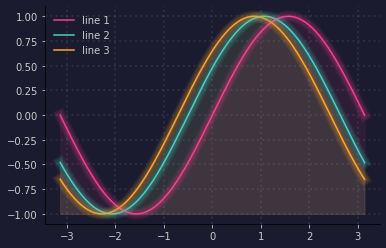

In [4]:
plot_lines([x1,x2,x3],[y1,y2,y3],'#1b1b2f', ['#f54291','#4cd3c2','#ffa931'])

In [5]:
labels = ['G1','G2','G3','G4','G5','G6','G7']
men = [20,34,30,45,23,33,31]
women = [12,14,34,35,55,56,23]
children = [2,4,12,9,5,11,14]
men1 = [20,34,30,45,23,33,31]
women1 = [12,14,34,35,55,56,23]
children1 = [2,4,12,9,5,11,14]

In [6]:
def plot_bar_charts(labels, values, background = '#1b1b2f', colors = ['#f54291','#4cd3c2'], legend = []):
    """Plota gráfico de barras com design específico.
    
    Parameters
    ----------
    labels : list
        Lista(s) com os grupos.
    values : list
        Lista(s) com as quantidades por rupo.
    background : str
        Cor do fundo 
    colors : list
        Lista com as cores para os grupos
    legend : list
        Lista com as legendas 
    """

    #gera a figura e os eixos
    #altera a cor do background
    fig, ax = plt.subplots(facecolor = background)
    ax = plt.gca()
    ax.set_facecolor('#1b1b2f')

    # remove os eixos
    for param in ['top', 'right']:
        ax.spines[param].set_visible(False)
    # altera a cor dos eixos
    for param in ['bottom','left']:
        ax.spines[param].set_color('#CCCCCC')
    # altera a cor dos valores dos eixos
    for i in ['x','y']:
        ax.tick_params(axis = i, colors = '#CCCCCC')

    # # adiciona as grades
    # plt.grid(color = '#CCCCCC', linestyle = ':', linewidth = 2, alpha = 0.1)

    # define o tamanho das barras
    width = 0.8/len(values)
    x = np.arange(len(labels))

    # verifica a quantidade de barras para calcular o posicionamento
    if len(values)%2 != 0:
        aux_x = np.arange(-len(values)+len(values)/2,len(values)-len(values)/2, dtype = float) * width
    else:
        aux_x = np.arange(-len(values)/2,(len(values))/2, dtype = float)* width

    # gera as barras
    for i in range(0, len(values)):
        bar = ax.bar(x+aux_x[i], values[i], width, color = colors[i], linewidth = 0.5)
    # adiciona as labels
    ax.set_xticks(x-width/2)
    ax.set_xticklabels(labels)

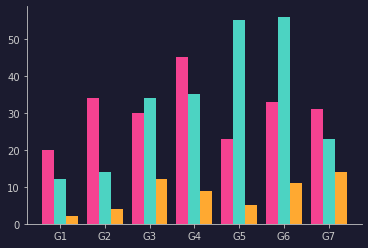

In [7]:
plot_bar_charts(labels, [men,women,children],'#1b1b2f', ['#f54291','#4cd3c2','#ffa931'])

In [14]:
def plot_gauge(value, background = '#1b1b2f', color = ['#f54291','#4cd3c2'], background_gauge = '#22223d'):
    """Plota gráfico de barras com design específico.
    
    Parameters
    ----------
    values : float
        Valor do gauge
    background : str
        Cor do fundo 
    color : str
        Cor do
    legend : list
        Lista com as legendas
    axis : boolean
        Se os eixos irão aparecer ou não
    grid : boolean
        Se as grades irão aparecer ou não
    axis_grid_colors : str
        Cor dos eixos e das grades
    """

    #gera a figura e altera a cor do background
    fig, ax = plt.subplots(facecolor = background)
    ax = plt.gca()
    ax.set_facecolor('#1b1b2f')
    size = 0.1

    startingRadius = 0.7 + (0.2 * 4)
    percentage = value
    remainingPie = 100-value
    donut_sizes = [percentage, remainingPie]
    for i in range(1,5):

        plt.pie(donut_sizes, radius = startingRadius, startangle = 90, colors = [color[i%2],background_gauge], wedgeprops ={'edgecolor': background, 'linewidth': 4})
        startingRadius -= 0.12
        percentage *= 0.5
        remainingPie *= 1
        donut_sizes = [percentage, remainingPie]


    circle = plt.Circle((0,0), 1.02, color = background)
    p = plt.gcf()
    p.gca().add_artist(circle)
    ax.annotate(f'{value} %', (0,0), fontsize = 36, color = 'w', va = 'center', ha = 'center', family = 'monospace')

    plt.show()

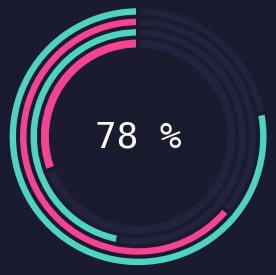

In [16]:
plot_gauge(78)

In [31]:
category = ['C1','C2','C3', 'C4', 'C5', 'C6']
total = [10,40,70,80, 10, 20]

In [32]:
def plot_horizontal_bar(labels, values, background = '#1b1b2f', colors = ['#f54291','#4cd3c2'], background_gauge = '#22223d'):
    """Plota gráfico de barras com design específico.
    
    Parameters
    ----------
    labels : list
        Lista(s) com os grupos.
    values : list
        Lista(s) com as quantidades por rupo.
    background : str
        Cor do fundo 
    colors : list
        Lista com as cores para os grupos
    """

    #gera a figura e os eixos
    #altera a cor do background
    fig, ax = plt.subplots(facecolor = background)
    ax = plt.gca()
    ax.set_facecolor('#1b1b2f')

    # remove os eixos
    for param in ['top', 'right', 'bottom', 'left']:
        ax.spines[param].set_visible(False)
    # altera a cor dos valores dos eixos
    for i in ['x','y']:
        ax.tick_params(axis = i, colors = '#CCCCCC')
    
    ax.set_xticks([])
    
    maxx = 0
    for i in values:
        if i > maxx:
            maxx = i
    category = []
    for x in range(0,len(labels)):
        category.append(f'{labels[x]} - {values[x]}')


    ax.barh(category, maxx + maxx/2, color = background_gauge , height = 0.2)
    ax.barh(category, values, color = colors, height = 0.2)


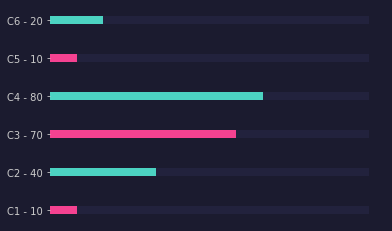

In [33]:
plot_horizontal_bar(category, total)